In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import csv

In [47]:
#tshark -r "ftpPi.pcapng" -Tfields -e frame.time_relative -e tcp.analysis.ack_rtt -Y "tcp.stream==27" > test3.csv
#this is the command to get the rtt values into a csv given a specified data stream. 

rtt = []
nums = []
file_path = 'experiment530.csv'

with open(file_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for index, row in enumerate(spamreader):
        if(row[1] != ''):
            rtt.append(float(row[1]))
            nums.append(float(index))

rtt = np.array(rtt)
nums = np.array(nums)

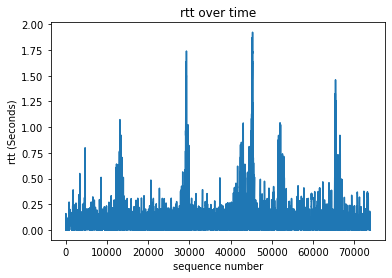

In [70]:
#confirmation that this is identical to WireShark TCP Statistics

plt.plot(nums, rtt)
plt.title("rtt over time")
plt.xlabel("sequence number")
plt.ylabel("rtt (Seconds)")
plt.show()

In [49]:
#Here, we calculate the periodic ack expression using the equation in the paper
#and statistics from WireShark. Note how the frequency is incredibly large
#because of a low RTT time. We are curious how this might change when 
#implementing their advenced RTT protocol. 

print(rtt.mean())
print(np.median(rtt))
print(max(rtt))
print(min(rtt))

rttmin = min(rtt)
periodic_ack = 4/rtt
min_periodic_ack = 4/rttmin
print(min_periodic_ack)

0.00011368596955658505
6.5e-05
0.009693
2.6e-05
153846.15384615384


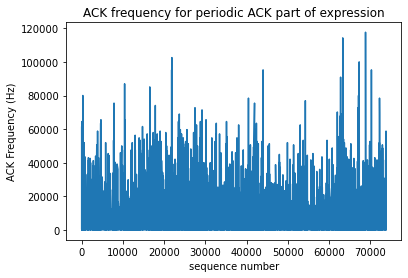

In [71]:
#Just out of curiosity here. Note how the next block shows that the byte counting ACK frequency
#goes as low as 560Hz, much lower than the average here given all measured RTT. 
plt.plot(nums, periodic_ack)
plt.title("ACK frequency for periodic ACK part of expression")
plt.xlabel("sequence number")
plt.ylabel("ACK Frequency (Hz)")
plt.show()

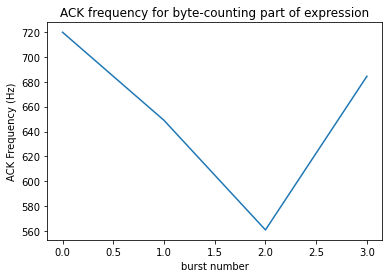

In [72]:
#now calculate other frequency value using throughput
#The .pcap file showed four major timestamps of data transmission so we used 
#those throughput values for four seperate data points in the end.

b_1 = (1.6812*10**7)/8

b_2 = (1.5161*10**7)/8

b_3 = (1.3107*10**7)/8

b_4 = (1.5987*10**7)/8

bursts = np.array([b_1, b_2, b_3, b_4])

MSS = 1460

L = 2

freq = bursts/(1460*2)

plt.plot(freq)
plt.title("ACK frequency for byte-counting part of expression")
plt.xlabel("burst number")
plt.ylabel("ACK Frequency (Hz)")
plt.show()

In [62]:
#This gives us the number of ACK's and DATA for the entire stream which is chopped up into the
#respective timestamps next.

file_path = 'packet_dissection_530.csv'

timestamps = []
numACK = 0
numDATA = 0
with open(file_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for index, row in enumerate(spamreader):
        #print(row)
        if(index == 0): print(row)
        if(row[5] == "\"66\"" and row[6][1] == "6"):
            #print(row)
            numACK+=1
            timestamps.append(float(row[1][1:-1]))
        elif(row[5] == "\"1460\"" and row[6][1] == "4"):
            numDATA+=1

print(numACK)
print(numDATA)

['"No."', '"Time"', '"Source"', '"Destination"', '"Protocol"', '"Length"', '"Info"']
3002
6452


In [54]:
#seperating the timestamps here.
#Note that while there are approx. double the data packets to ACK packets, we normalize the values s.t.
#it is as if we are comparing to a 1:1 data to ACK ratio.

numlt3 = 0
numlt10 = 0
numlt16 = 0
numlt23 = 0
timespan = 2.983698 - 2.865187
timespan10 = 10.458311 - 10.303652
timespan16 = 16.840088 - 16.728681
timespan22 = 22.162513 - 22.046058
for time in timestamps:
    #print(time)
    if(time < 3):
        numlt3+=1
    elif(time > 10 and time < 11):
        numlt10+=1
    elif(time > 16 and time < 17):
        numlt16+=1
    elif(time > 22 and time < 23):
        numlt23+=1
    
        
print(numlt3)
print(timespan)
print(numlt3/timespan)
print("Potential reduction in ACKs - " + str(100*(1-(freq[0]/(numlt3/timespan)*numACK/numDATA))) + "%")
print(numlt10)
print(timespan10)
print(numlt10/timespan10)
print("Potential reduction in ACKs - " + str(100*(1-(freq[1]/(numlt10/timespan10)*numACK/numDATA)))+"%")
print(numlt16)
print(timespan16)
print(numlt16/timespan16)
print("Potential reduction in ACKs - " + str(100*(1-(freq[2]/(numlt16/timespan16)*numACK/numDATA)))+"%")
print(numlt23)
print(timespan22)
print(numlt23/timespan22)
print("Potential reduction in ACKs - " + str(100*(1-(freq[3]/(numlt23/timespan22)*numACK/numDATA)))+"%")

673
0.11851099999999981
5678.797748732194
Potential reduction in ACKs - 94.10333479427845%
623
0.15465900000000055
4028.216915924698
Potential reduction in ACKs - 92.50350096180394%
413
0.11140699999999981
3707.127918353431
Potential reduction in ACKs - 92.95778600400394%
599
0.11645500000000197
5143.617706410114
Potential reduction in ACKs - 93.80927114377822%


In [63]:
#This is the same set of steps at the run above. 
#The key difference is that also we consider the run as one whole datasteam
#and do not cut it up for a holistic review too. 

rtt = []
nums = []
file_path = 'experiment61.csv'

with open(file_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for index, row in enumerate(spamreader):
        if(row[1] != ''):
            rtt.append(float(row[1]))
            nums.append(float(index))

rtt = np.array(rtt)
nums = np.array(nums)

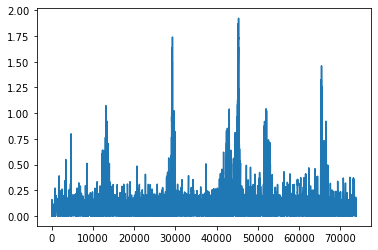

In [64]:
plt.plot(nums,rtt)
plt.title("rtt over time")
plt.xlabel("sequence number")
plt.ylabel("rtt (Seconds)")
plt.show()

0.21558891720172493
0.189431
1.922197
3.4e-05
117647.05882352941


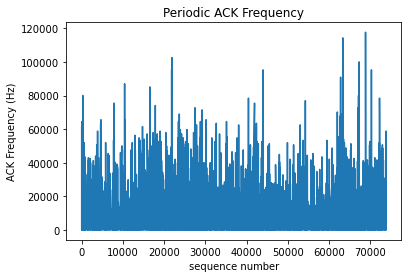

In [73]:
print(rtt.mean())
print(np.median(rtt))
print(max(rtt))
print(min(rtt))
rttmin = min(rtt)
periodic_ack = 4/rtt
min_periodic_ack = 4/rttmin
print(min_periodic_ack)
plt.plot(nums, periodic_ack)
plt.title("Periodic ACK Frequency")
plt.xlabel("sequence number")
plt.ylabel("ACK Frequency (Hz)")
plt.show()

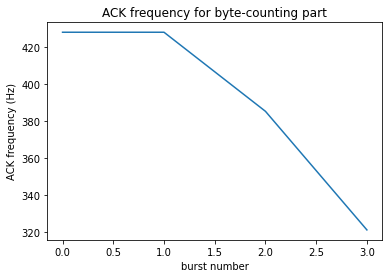

In [74]:
b_1 = (1*10**7)/8 #30-38 seconds

b_2 = (1*10**7)/8 #15-25 seconds

b_3 = (9*10**6)/8 #58-66 seconds

b_4 = (7.5*10**6)/8 #49-53

bursts = np.array([b_1, b_2, b_3, b_4])

MSS = 1460

L = 2

freq = bursts/(1460*2)

plt.plot(freq)
plt.title("ACK frequency for byte-counting part")
plt.xlabel("burst number")
plt.ylabel("ACK frequency (Hz)")
plt.show()

In [67]:
file_path = 'packet_dissection_61.csv'

timestamps = []
numACK = 0
numDATA = 0
with open(file_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for index, row in enumerate(spamreader):
        if(index == 0): print(row)
        if(row[4][1:-1] == "TCP"):
            numACK+=1
            #timestamps.append((float(row[1][1:-1])))
        elif(row[4][1:-1] == "SSHv2"):
            numDATA+=1
            timestamps.append((float(row[1][1:-1])))
print(numACK)
print(numDATA)
#print(timestamps)
print(numDATA *1304 / (numDATA *66 + numDATA *1304))
print(numDATA *1304 / (numDATA *66*(1-.941) + numDATA *1304))
print((numDATA *1304 / (numDATA *66*(1-.941) + numDATA *1304))/(numDATA *1304 / (numDATA *66 + numDATA *1304)))
print(numDATA *1304)

['"No."', '"Time"', '"Source"', '"Destination"', '"Protocol"', '"Length"', '"Info"']
9858
63959
0.9518248175182482
0.9970226944997072
1.0474854995894163
83402536


In [68]:

numlt16 = 0
numlt23 = 0
timespan16 = 66 - 58
timespan22 = 53 - 49
for time in timestamps:
    if(time > 58 and time < 66):
        numlt16+=1
    elif(time > 49 and time < 53):
        numlt23+=1
print(numlt16)
print(timespan16)
print(numlt16/timespan16)
print("Potential reduction in ACKs - " + str(100*(1-(freq[2]/(numlt16/timespan16)*numACK/numDATA))) + "%")
print(numlt23)
print(timespan22)
print(numlt23/timespan22)
print("Potential reduction in ACKs - " + str(100*(1-(freq[3]/(numlt23/timespan22)*numACK/numDATA)))+ "%")
print(len(timestamps))
print(max(timestamps) - min(timestamps))
print(len(timestamps)/(max(timestamps) - min(timestamps)))
print("Potential reduction in ACKs - " + str(100*(1-(freq[3]/(len(timestamps)/(max(timestamps) - min(timestamps)))*numACK/numDATA)))+ "%")

6278
8
784.75
Potential reduction in ACKs - 92.43296930725226%
2385
4
596.25
Potential reduction in ACKs - 91.7005907251799%
63959
75.705341
844.8413170743131
Potential reduction in ACKs - 94.14266007106727%
